In [6]:
# Instalación de módulos necesarios
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 8.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9027 - loss: 0.2537 - val_accuracy: 0.9134 - val_loss: 0.2047
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9095 - loss: 0.1971 - val_accuracy: 0.9129 - val_loss: 0.2006
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9131 - loss: 0.1887 - val_accuracy: 0.9123 - val_loss: 0.1981
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9092 - loss: 0.1958 - val_accuracy: 0.9126 - val_loss: 0.1969
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9144 - loss: 0.1877 - val_accuracy: 0.9137 - val_loss: 0.1926
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9096 - loss: 0.1927 - val_accuracy: 0.9126 - val_loss: 0.1942
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9139 - loss: 0.1867 - val_accuracy: 0.9175 - val_loss: 0.1897
Epoch 8/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9127 - loss: 0.1841 - val_accuracy: 0.

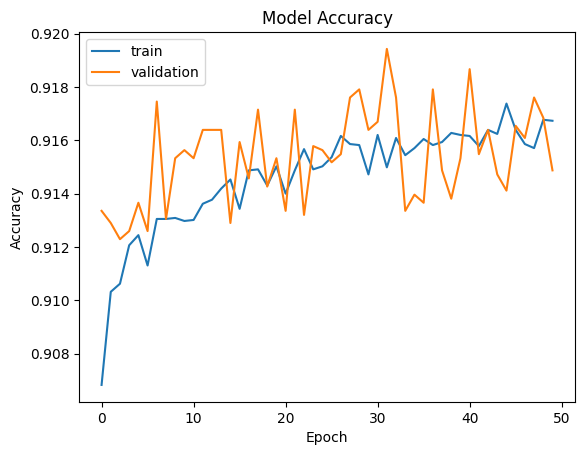

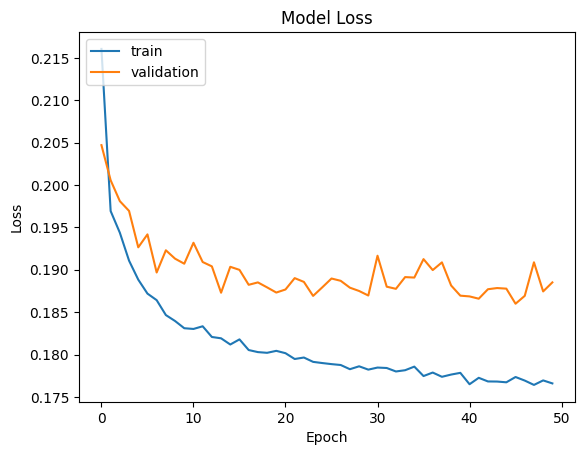

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9087 - loss: 0.1905
Model Loss: 0.1836940348148346
Model Accuracy: 0.9133284687995911
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.56      0.59       935

    accuracy                           0.91      8238
   macro avg       0.79      0.76      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Paso 1: Carga del Conjunto de Datos
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Paso 2: Visualización de una Muestra
print(data.head())

# Filtrar las variables especificadas
input_vars = ['duration', 'nr.employed', 'pdays', 'poutcome', 'euribor3m', 'emp.var.rate', 'previous', 'contact']
data = data[input_vars + ['y']]

# Paso 3: Normalización de los Datos
# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['poutcome', 'contact'], drop_first=True)

# Encode the target variable
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# Standardize the numerical variables
scaler = StandardScaler()
numerical_vars = ['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous']
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Define input and output variables
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Construcción del Modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Paso 5: Compilación del Modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Paso 6: Entrenamiento del Modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Paso 7: Graficar el Historial de Entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Paso 8: Evaluación del Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')
print(f'Model Accuracy: {accuracy}')

# Paso 9: Predicción de una Muestra
y_pred = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8629 - loss: 0.3374 - val_accuracy: 0.9024 - val_loss: 0.2141
Epoch 2/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9030 - loss: 0.2155 - val_accuracy: 0.9059 - val_loss: 0.2101
Epoch 3/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9055 - loss: 0.2099 - val_accuracy: 0.9105 - val_loss: 0.2066
Epoch 4/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9060 - loss: 0.2051 - val_accuracy: 0.9106 - val_loss: 0.2046
Epoch 5/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9036 - loss: 0.2071 - val_accuracy: 0.9147 - val_loss: 0.2033
Epoch 6/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9059 - loss: 0.2049 - val_accuracy: 0.9137 - val_loss: 0.2017
Epoch 7/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2049 - val_accuracy: 0.9102 - val_loss: 0.2028
Epoch 8/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9107 - loss: 0.1973 - val_accu

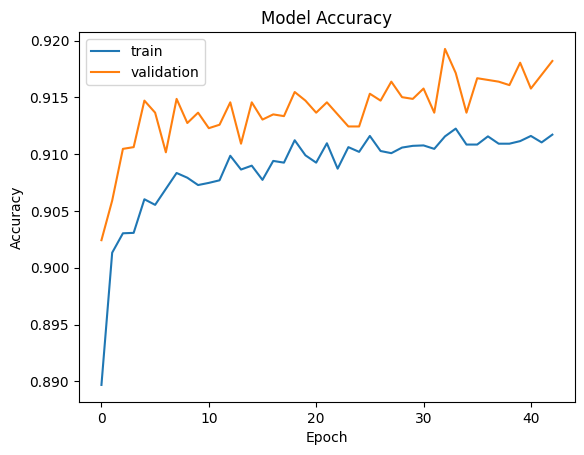

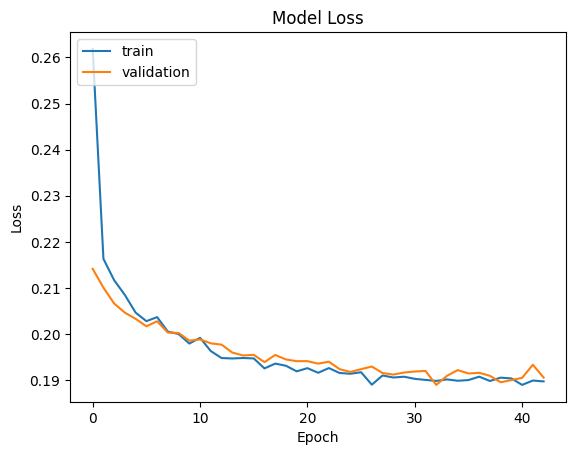

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9123 - loss: 0.1921
Model Loss: 0.186667338013649
Model Accuracy: 0.9153921008110046
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.68      0.49      0.57       935

    accuracy                           0.92      8238
   macro avg       0.81      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Paso 1: Carga del Conjunto de Datos
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Paso 2: Visualización de una Muestra
print(data.head())

# Filtrar las variables especificadas
input_vars = ['duration', 'nr.employed', 'pdays', 'poutcome', 'euribor3m', 'emp.var.rate', 'previous', 'contact']
data = data[input_vars + ['y']]

# Paso 3: Normalización de los Datos
# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['poutcome', 'contact'], drop_first=True)

# Encode the target variable
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# Standardize the numerical variables
scaler = StandardScaler()
numerical_vars = ['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous']
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Define input and output variables
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Construcción del Modelo con optimización
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Agregar dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Agregar dropout
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Paso 5: Compilación del Modelo
optimizer = Adam(learning_rate=0.001)  # Cambiar optimizador
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Paso 6: Entrenamiento del Modelo con EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# Paso 7: Graficar el Historial de Entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Paso 8: Evaluación del Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')
print(f'Model Accuracy: {accuracy}')

# Paso 9: Predicción de una Muestra
y_pred = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
